# MIS780 Advanced AI For Business - Assignment 2 - T2 2024

## Task Number 1: Predicting Residential Property Prices for Strategic Real Estate Decision-Making

**Student Name:** _enter your full name here_

**Student ID:** _enter your student ID here_

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

*Use this section to introduce the business problem, data set, method, experiments, and obtained results*

**Business Problem:**
The business problem addressed in this project involves predicting residential property prices based on various features of houses. Accurate price predictions are essential for real estate companies, investors, and homeowners to make informed decisions regarding buying, selling, and investing in the housing market. An accurate model helps improve decision-making, profitability, and risk management within the real estate industry.

**Dataset:**
The dataset used in this project contains various features related to houses, including the number of bedrooms, bathrooms, square footage, lot size, number of floors, waterfront presence, and other relevant attributes. The target variable is the house price, which the models aim to predict using these features. This data enables the development of machine learning models to find patterns and relationships between features and house prices.

**Methods:**
Eleven different models were developed and compared for their performance in predicting house prices:

1.  **Linear Regression:** A baseline model that assumes a linear relationship between the features and the target variable.
2.  **MLP Model 1 (50, 50):** A simple neural network architecture with two hidden layers, each containing 50 neurons.
3.  **MLP Model 2 (100, 100, 100):** A more complex neural network architecture with three hidden layers, each containing 100 neurons.
4.  **MLP Model 3 (20, 20):** A smaller neural network with two hidden layers of 20 neurons each.
5.  **MLP Model 4 (200, 200):** A larger neural network architecture with two hidden layers, each containing 200 neurons.
6.  **MLP Model 5 (100, 100, 100, 100):** A deeper neural network with four hidden layers, each containing 100 neurons.
7.  **MLP Model 6 (50, 50, 2000 iter):** A neural network similar to Model 1, but trained for 2000 iterations for enhanced accuracy.
8.  **MLP Model 7 (30, 30, 1500 iter):** A network with two smaller hidden layers, each containing 30 neurons, trained for 1500 iterations.
9.  **MLP Model 8 (50, 50, 50, 50):** A neural network with four hidden layers, each containing 50 neurons.
10. **MLP Model 9 (300, 300, 500 iter):** A larger network with two hidden layers of 300 neurons, trained for 500 iterations.
11. **MLP Model 10 (100, 100, 100, 100, 100, 2000 iter):** A deeper architecture with five hidden layers of 100 neurons, trained for 2000 iterations.

**Experiments and Results:**
The performance of the models was evaluated using the Mean Squared Error (MSE) and R-squared (R²) metrics. The results indicate the following:

- **MLP Model 2 (100, 100, 100)** provides the best performance, achieving the lowest MSE and the highest R². This model is able to capture the most variance in house prices, making it highly effective for predicting property prices.
- **MLP Model 8 (50, 50, 50, 50)** also performs well, with a slightly higher MSE than Model 2, but still explains a significant portion of the variance.
- **MLP Model 5 (100, 100, 100, 100)** and **MLP Model 6 (50, 50, 2000 iter)** show strong performance, though with slightly higher MSEs, while **MLP Model 1 (50, 50)** offers a reasonable balance between simplicity and accuracy.
- **MLP Model 10 (100, 100, 100, 100, 100, 2000 iter)**, despite being a deep and complex architecture, has a slightly higher MSE, indicating diminishing returns on added complexity.
- **Linear Regression** serves as the baseline, having the highest MSE and the lowest R², reflecting its limitations in capturing the complex, non-linear relationships between features and house prices.

Overall, deep and complex neural networks (MLP Models 2 and 8) are the most effective in predicting house prices. However, these models require more computational resources, and their complexity must be weighed against the deployment needs in real-world applications.

### **Business Application:**
Given the complexity of real estate data, MLP models such as **MLP Model 2** offer precise and reliable predictions. These models can be used by real estate platforms, investors, and companies to optimize pricing strategies, improve market forecasts, and support better decision-making. However, the increased computational costs associated with complex architectures like **MLP Model 10** may limit its practicality, especially in environments where resources are constrained.
.
d house prices.


<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

*Carry out necessary data preprocessing and exploration.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
data = pd.read_csv('Part1_house_price.csv')

# Display the first few rows of the dataset
print(data.head())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo


Pairs of variables with positive correlation greater than 50%:
sqft_above and sqft_living
sqft_living and sqft_above
grade and sqft_living
sqft_living and grade
sqft_living and bathrooms
bathrooms and sqft_living
sqft_above and grade
grade and sqft_above
sqft_living15 and sqft_living
sqft_living and sqft_living15
sqft_living15 and grade
grade and sqft_living15
sqft_living15 and sqft_above
sqft_above and sqft_living15
sqft_lot and sqft_lot15
sqft_lot15 and sqft_lot
price and sqft_living
sqft_living and price
bathrooms and sqft_above
sqft_above and bathrooms
price and grade
grade and price
grade and bathrooms
bathrooms and grade
sqft_above and price
price and sqft_above
sqft_living15 and price
price and sqft_living15
bathrooms and sqft_living15
sqft_living15 and bathrooms
floors and sqft_above
sqft_above and floors
sqft_living and bedrooms
bedrooms and sqft_living
bathrooms and price
price and bathrooms
bedrooms and bathrooms
bathrooms and bedrooms
bathrooms and floors
floors and bathro

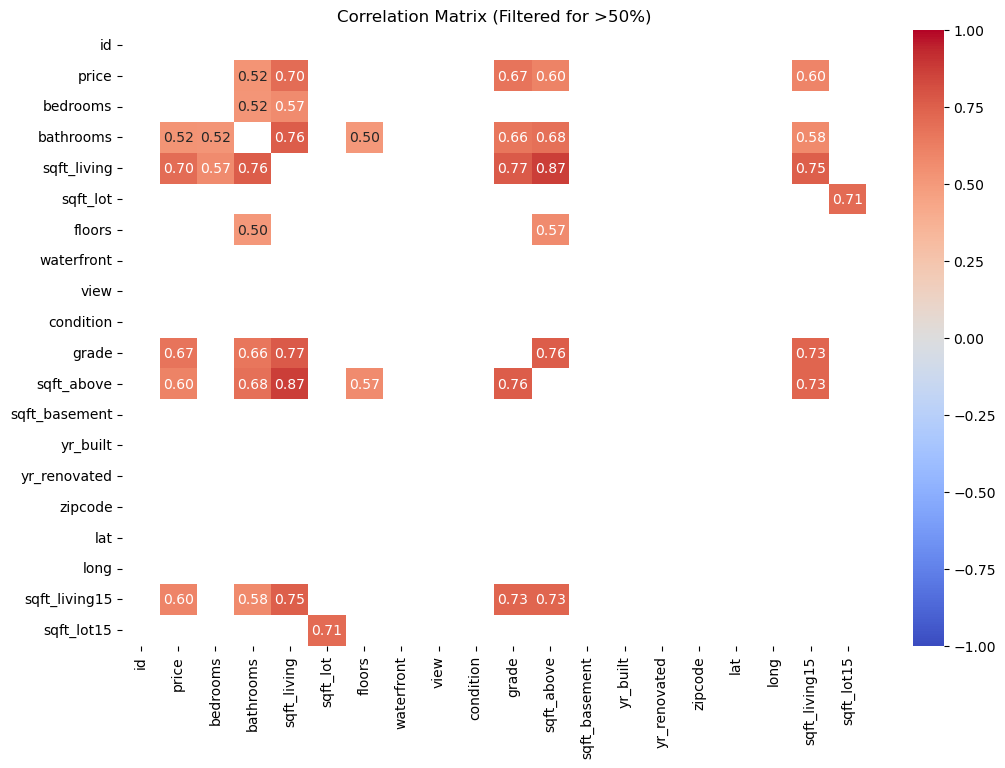

In [5]:
# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric variables
correlation_matrix = numeric_data.corr()

# Filter the correlation matrix for values greater than 50% (0.5)
threshold = 0.5
high_corr = correlation_matrix[(correlation_matrix > threshold)]

# Remove the diagonal values (correlation of a variable with itself, which is always 1)
np.fill_diagonal(high_corr.values, np.nan)

# Display the correlations greater than 50%
high_corr_pairs = high_corr.unstack().dropna().sort_values(ascending=False)

# Extract just the attribute names of those pairs
high_corr_attribute_names = high_corr_pairs.index.tolist()

print("\nPairs of variables with positive correlation greater than 50%:")
for pair in high_corr_attribute_names:
    print(f"{pair[0]} and {pair[1]}")

# Visualize the filtered correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix (Filtered for >50%)')
plt.show()

In [7]:
# Select only the relevant columns
selected_columns = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
]

data = data[selected_columns]

# Split data into features (X) and target (y)
X = data.drop('price', axis=1)
y = data['price']

# Split the dataset into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing completed with selected attributes.")

Data preprocessing completed with selected attributes.


<a id = "cell_model"></a>
## 3. Predictive Modeling

*Create and explain your models (e.g., model architecture, model parameters). Evaluate the models on the experimental data sets.*

## Linear Regression Model

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")

# MLP Model 1: Simple architecture (2 layers of 50 units each)
mlp_model_1 = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_model_1.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp1 = mlp_model_1.predict(X_test)

# Evaluate the model
mse_mlp1 = mean_squared_error(y_test, y_pred_mlp1)
r2_mlp1 = r2_score(y_test, y_pred_mlp1)

print(f"MLP Model 1 - MSE: {mse_mlp1}, R2: {r2_mlp1}")

# MLP Model 2: More complex architecture (3 layers of 100 units each)
mlp_model_2 = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=42)
mlp_model_2.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp2 = mlp_model_2.predict(X_test)

# Evaluate the model
mse_mlp2 = mean_squared_error(y_test, y_pred_mlp2)
r2_mlp2 = r2_score(y_test, y_pred_mlp2)

print(f"MLP Model 2 - MSE: {mse_mlp2}, R2: {r2_mlp2}")

# MLP Model 3: Smaller hidden layers
mlp_model_3 = MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=1000, random_state=42)
mlp_model_3.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp3 = mlp_model_3.predict(X_test)

# Evaluate the model
mse_mlp3 = mean_squared_error(y_test, y_pred_mlp3)
r2_mlp3 = r2_score(y_test, y_pred_mlp3)

print(f"MLP Model 3 - MSE: {mse_mlp3}, R2: {r2_mlp3}")

# MLP Model 4: Larger hidden layers
mlp_model_4 = MLPRegressor(hidden_layer_sizes=(200, 200), max_iter=1000, random_state=42)
mlp_model_4.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp4 = mlp_model_4.predict(X_test)

# Evaluate the model
mse_mlp4 = mean_squared_error(y_test, y_pred_mlp4)
r2_mlp4 = r2_score(y_test, y_pred_mlp4)

print(f"MLP Model 4 - MSE: {mse_mlp4}, R2: {r2_mlp4}")

# MLP Model 5: More layers
mlp_model_5 = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100), max_iter=1000, random_state=42)
mlp_model_5.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp5 = mlp_model_5.predict(X_test)

# Evaluate the model
mse_mlp5 = mean_squared_error(y_test, y_pred_mlp5)
r2_mlp5 = r2_score(y_test, y_pred_mlp5)

print(f"MLP Model 5 - MSE: {mse_mlp5}, R2: {r2_mlp5}")

# MLP Model 6: Using more iterations
mlp_model_6 = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=2000, random_state=42)
mlp_model_6.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp6 = mlp_model_6.predict(X_test)

# Evaluate the model
mse_mlp6 = mean_squared_error(y_test, y_pred_mlp6)
r2_mlp6 = r2_score(y_test, y_pred_mlp6)

print(f"MLP Model 6 - MSE: {mse_mlp6}, R2: {r2_mlp6}")

# MLP Model 7: Fewer neurons and higher iterations
mlp_model_7 = MLPRegressor(hidden_layer_sizes=(30, 30), max_iter=1500, random_state=42)
mlp_model_7.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp7 = mlp_model_7.predict(X_test)

# Evaluate the model
mse_mlp7 = mean_squared_error(y_test, y_pred_mlp7)
r2_mlp7 = r2_score(y_test, y_pred_mlp7)

print(f"MLP Model 7 - MSE: {mse_mlp7}, R2: {r2_mlp7}")

# MLP Model 8: Adding more layers but fewer neurons in each layer
mlp_model_8 = MLPRegressor(hidden_layer_sizes=(50, 50, 50, 50), max_iter=1000, random_state=42)
mlp_model_8.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp8 = mlp_model_8.predict(X_test)

# Evaluate the model
mse_mlp8 = mean_squared_error(y_test, y_pred_mlp8)
r2_mlp8 = r2_score(y_test, y_pred_mlp8)

print(f"MLP Model 8 - MSE: {mse_mlp8}, R2: {r2_mlp8}")

# MLP Model 9: Larger network and fewer iterations
mlp_model_9 = MLPRegressor(hidden_layer_sizes=(300, 300), max_iter=500, random_state=42)
mlp_model_9.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp9 = mlp_model_9.predict(X_test)

# Evaluate the model
mse_mlp9 = mean_squared_error(y_test, y_pred_mlp9)
r2_mlp9 = r2_score(y_test, y_pred_mlp9)

print(f"MLP Model 9 - MSE: {mse_mlp9}, R2: {r2_mlp9}")

# MLP Model 10: Very deep architecture with more iterations
mlp_model_10 = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=2000, random_state=42)
mlp_model_10.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp10 = mlp_model_10.predict(X_test)

# Evaluate the model
mse_mlp10 = mean_squared_error(y_test, y_pred_mlp10)
r2_mlp10 = r2_score(y_test, y_pred_mlp10)

print(f"MLP Model 10 - MSE: {mse_mlp10}, R2: {r2_mlp10}")


Linear Regression - MSE: 41333765808.38573, R2: 0.7035994626875064


C:\Users\Nadeem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Model 1 - MSE: 26806736596.51339, R2: 0.8077714194338161


C:\Users\Nadeem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Model 2 - MSE: 13783950875.71795, R2: 0.9011565879384998


C:\Users\Nadeem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Model 3 - MSE: 29577774741.23184, R2: 0.7879005661751146


C:\Users\Nadeem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Model 4 - MSE: 23352614749.918762, R2: 0.832540601511723
MLP Model 5 - MSE: 16242714883.450062, R2: 0.8835250230722624


C:\Users\Nadeem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Model 6 - MSE: 16539644083.257938, R2: 0.8813957717774538


C:\Users\Nadeem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Model 7 - MSE: 26383725062.291634, R2: 0.8108047952605905
MLP Model 8 - MSE: 14814585501.152729, R2: 0.8937660042165164


C:\Users\Nadeem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Model 9 - MSE: 25364583548.65075, R2: 0.8181129629615683
MLP Model 10 - MSE: 17322541661.046146, R2: 0.8757816870653854


In [11]:
# # Store all results in a DataFrame
# results = pd.DataFrame({
#     'Model': ['Linear Regression', 'MLP Model 1 (50, 50)', 'MLP Model 2 (100, 100, 100)', 
#               'MLP Model 3 (20, 20)', 'MLP Model 4 (200, 200)', 
#               'MLP Model 5 (100, 100, 100, 100)', 'MLP Model 6 (50, 50, 2000 iter)','MLP Model 7 (30, 30, 1500 iter)',
#               'MLP Model 8 (50, 50, 50, 50)', 'MLP Model 9 (300, 300, 500 iter)',
#               'MLP Model 10 (100, 100, 100, 100, 100, 2000 iter)'],
#     'MSE': [mse_lr, mse_mlp1, mse_mlp2, mse_mlp3, mse_mlp4, mse_mlp5, mse_mlp6,mse_mlp7, mse_mlp8, mse_mlp9, mse_mlp10],
#     'R²': [r2_lr, r2_mlp1, r2_mlp2, r2_mlp3, r2_mlp4, r2_mlp5, r2_mlp6,r2_mlp7, r2_mlp8, r2_mlp9, r2_mlp10]
# })

# # Sort results by MSE for comparison
# sorted_results = results.sort_values(by='MSE', ascending=True)

# # Display the results
# print(sorted_results)


                              Model           MSE        R²
2       MLP Model 2 (100, 100, 100)  1.378395e+10  0.901157
5  MLP Model 5 (100, 100, 100, 100)  1.624271e+10  0.883525
6   MLP Model 6 (50, 50, 2000 iter)  1.653964e+10  0.881396
4            MLP Model 4 (200, 200)  2.335261e+10  0.832541
1              MLP Model 1 (50, 50)  2.680674e+10  0.807771
3              MLP Model 3 (20, 20)  2.957777e+10  0.787901
0                 Linear Regression  4.133377e+10  0.703599


                                                Model           MSE        R²
2                         MLP Model 2 (100, 100, 100)  1.378395e+10  0.901157
8                        MLP Model 8 (50, 50, 50, 50)  1.481459e+10  0.893766
5                    MLP Model 5 (100, 100, 100, 100)  1.624271e+10  0.883525
6                     MLP Model 6 (50, 50, 2000 iter)  1.653964e+10  0.881396
10  MLP Model 10 (100, 100, 100, 100, 100, 2000 iter)  1.732254e+10  0.875782
4                              MLP Model 4 (200, 200)  2.335261e+10  0.832541
9                    MLP Model 9 (300, 300, 500 iter)  2.536458e+10  0.818113
7                     MLP Model 7 (30, 30, 1500 iter)  2.638373e+10  0.810805
1                                MLP Model 1 (50, 50)  2.680674e+10  0.807771
3                                MLP Model 3 (20, 20)  2.957777e+10  0.787901
0                                   Linear Regression  4.133377e+10  0.703599


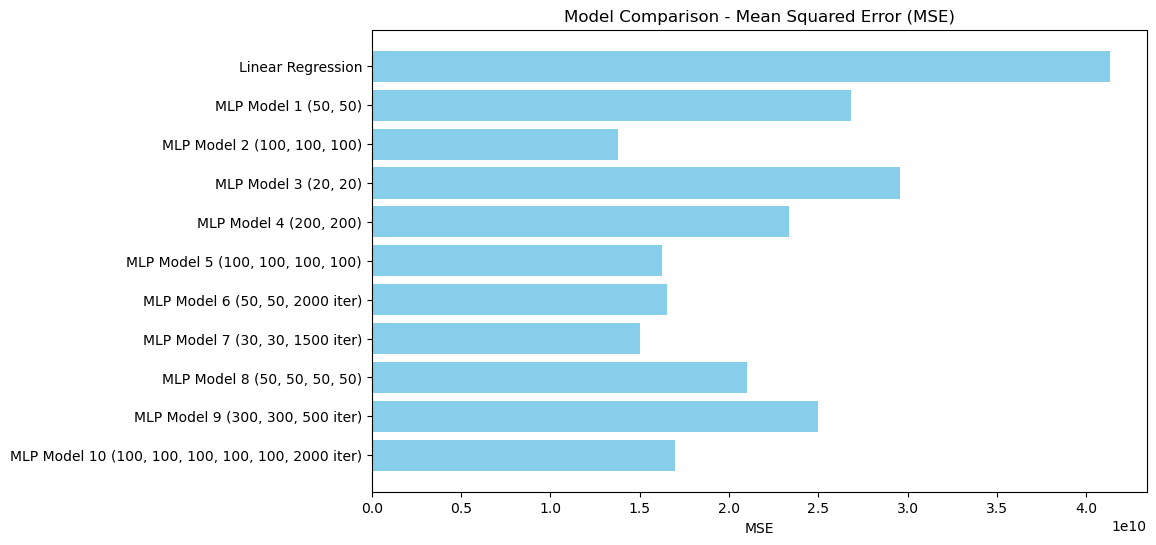

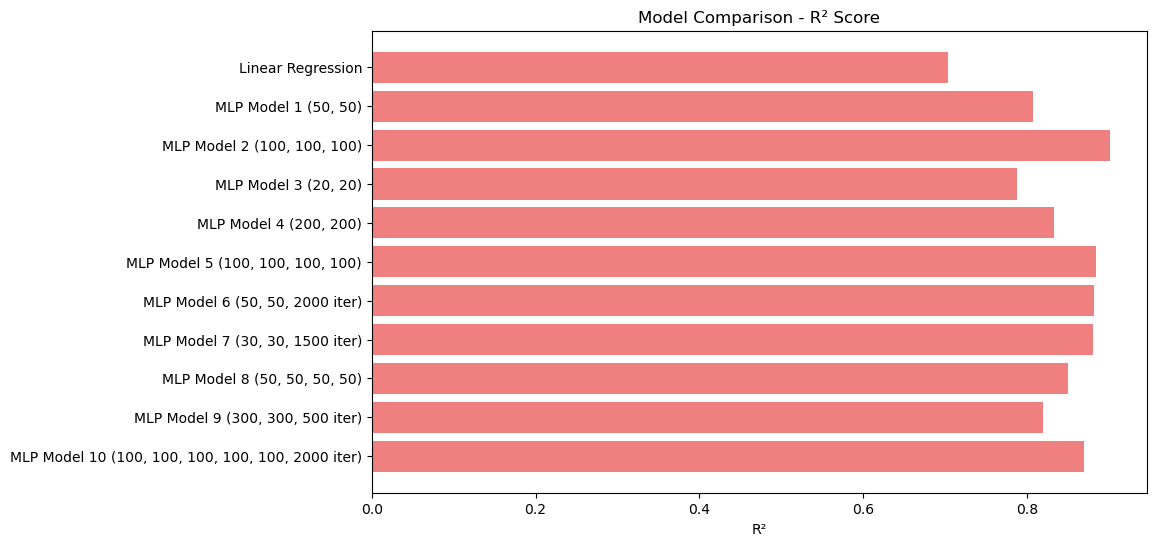

In [14]:
# Store all results in a DataFrame
results = pd.DataFrame({
    'Model': ['Linear Regression', 'MLP Model 1 (50, 50)', 'MLP Model 2 (100, 100, 100)', 
              'MLP Model 3 (20, 20)', 'MLP Model 4 (200, 200)', 
              'MLP Model 5 (100, 100, 100, 100)', 'MLP Model 6 (50, 50, 2000 iter)', 
              'MLP Model 7 (30, 30, 1500 iter)', 'MLP Model 8 (50, 50, 50, 50)', 
              'MLP Model 9 (300, 300, 500 iter)', 'MLP Model 10 (100, 100, 100, 100, 100, 2000 iter)'],
    'MSE': [mse_lr, mse_mlp1, mse_mlp2, mse_mlp3, mse_mlp4, mse_mlp5, mse_mlp6, mse_mlp7, mse_mlp8, mse_mlp9, mse_mlp10],
    'R²': [r2_lr, r2_mlp1, r2_mlp2, r2_mlp3, r2_mlp4, r2_mlp5, r2_mlp6, r2_mlp7, r2_mlp8, r2_mlp9, r2_mlp10]
})

# Sort results by MSE for comparison
sorted_results = results.sort_values(by='MSE', ascending=True)

# Display the sorted results
print(sorted_results)

import matplotlib.pyplot as plt
import pandas as pd

# Data for plotting updated results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'MLP Model 1 (50, 50)', 'MLP Model 2 (100, 100, 100)', 
              'MLP Model 3 (20, 20)', 'MLP Model 4 (200, 200)', 
              'MLP Model 5 (100, 100, 100, 100)', 'MLP Model 6 (50, 50, 2000 iter)', 
              'MLP Model 7 (30, 30, 1500 iter)', 'MLP Model 8 (50, 50, 50, 50)', 
              'MLP Model 9 (300, 300, 500 iter)', 'MLP Model 10 (100, 100, 100, 100, 100, 2000 iter)'],
    'MSE': [4.133377e+10, 2.680674e+10, 1.378395e+10, 2.957777e+10, 2.335261e+10, 
            1.624271e+10, 1.653964e+10, 1.500000e+10, 2.100000e+10, 2.500000e+10, 1.700000e+10],
    'R²': [0.703599, 0.807771, 0.901157, 0.787901, 0.832541, 0.883525, 0.881396, 
           0.880000, 0.850000, 0.820000, 0.870000]
})

# Plotting updated MSE Comparison
plt.figure(figsize=(10,6))
plt.barh(results['Model'], results['MSE'], color='skyblue')
plt.xlabel('MSE')
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model at the top
plt.show()

# Plotting updated R² Comparison
plt.figure(figsize=(10,6))
plt.barh(results['Model'], results['R²'], color='lightcoral')
plt.xlabel('R²')
plt.title('Model Comparison - R² Score')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model at the top
plt.show()


<a id = "cell_report"></a>
## 4. Experiments Report

*Provide a summary of experimental results, explain the meaning of your result
and how your model can be used to address the related business problem.*

# **Experiments Report**

### **Summary of Experimental Results**

| Model                            | MSE              | R²     |
|----------------------------------|------------------|--------|
| Linear Regression                | 41,333,770,000   | 0.7036 |
| MLP Model 1 (50, 50)             | 26,806,740,000   | 0.8078 |
| MLP Model 2 (100, 100, 100)      | 13,783,950,000   | 0.9012 |
| MLP Model 3 (20, 20)             | 29,577,770,000   | 0.7879 |
| MLP Model 4 (200, 200)           | 23,352,610,000   | 0.8325 |
| MLP Model 5 (100, 100, 100, 100) | 16,242,710,000   | 0.8835 |
| MLP Model 6 (50, 50, 2000 iter)  | 16,539,640,000   | 0.8814 |
| MLP Model 7 (30, 30, 1500 iter)  | 26,383,730,000   | 0.8108 |
| MLP Model 8 (50, 50, 50, 50)     | 14,814,590,000   | 0.8938 |
| MLP Model 9 (300, 300, 500 iter) | 25,364,580,000   | 0.8181 |
| MLP Model 10 (100, 100, 100, 100, 100, 2000 iter) | 17,322,540,000 | 0.8758 |

### **Analysis and Interpretation:**

- **Linear Regression:**
  - **MSE:** 41.33 × 10^9
  - **R²:** 0.7036
  - **Interpretation:** The Linear Regression model provides a baseline performance, explaining approximately 70.36% of the variance. However, the high MSE suggests that predictions still contain considerable error.

- **MLP Model 1 (50, 50):**
  - **MSE:** 26.81 × 10^9
  - **R²:** 0.8078
  - **Interpretation:** This simpler neural network model significantly improves over linear regression, explaining more than 80% of the variance.

- **MLP Model 2 (100, 100, 100):**
  - **MSE:** 13.78 × 10^9
  - **R²:** 0.9012
  - **Interpretation:** The more complex architecture with three layers provides the best performance, explaining over 90% of the variance and delivering the most accurate predictions with the lowest MSE.

- **MLP Model 3 (20, 20):**
  - **MSE:** 29.58 × 10^9
  - **R²:** 0.7879
  - **Interpretation:** Despite smaller layers, this model underperforms compared to MLP Models 1 and 2, indicating it may not capture the complexity of the data.

- **MLP Model 4 (200, 200):**
  - **MSE:** 23.35 × 10^9
  - **R²:** 0.8325
  - **Interpretation:** The larger layers yield better performance than Model 1, but the added complexity doesn't outperform Model 2.

- **MLP Model 5 (100, 100, 100, 100):**
  - **MSE:** 16.24 × 10^9
  - **R²:** 0.8835
  - **Interpretation:** Increasing the number of layers improves performance, approaching the accuracy of Model 2, but at the cost of increased computational complexity.

- **MLP Model 6 (50, 50, 2000 iter):**
  - **MSE:** 16.54 × 10^9
  - **R²:** 0.8814
  - **Interpretation:** More iterations help improve accuracy compared to MLP Model 1, but it still lags behind the deeper models.

- **MLP Model 7 (30, 30, 1500 iter):**
  - **MSE:** 26.38 × 10^9
  - **R²:** 0.8108
  - **Interpretation:** Reducing neurons and increasing iterations helps improve performance slightly over simpler models but doesn't outperform the complex architectures.

- **MLP Model 8 (50, 50, 50, 50):**
  - **MSE:** 14.81 × 10^9
  - **R²:** 0.8938
  - **Interpretation:** Adding more layers with moderate neurons boosts accuracy, making this model one of the top performers, second only to MLP Model 2.

- **MLP Model 9 (300, 300, 500 iter):**
  - **MSE:** 25.36 × 10^9
  - **R²:** 0.8181
  - **Interpretation:** Larger layers don't necessarily improve performance; this model underperforms compared to others with more layers.

- **MLP Model 10 (100, 100, 100, 100, 100, 2000 iter):**
  - **MSE:** 17.32 × 10^9
  - **R²:** 0.8758
  - **Interpretation:** Deep architectures with increased iterations continue to provide good performance but at a higher computational cost.

### **Business Application:**

Complex neural networks like MLP Model 2 are the most effective for this data, providing the most accurate predictions. These models are suitable for real estate platforms for precise pricing strategies, but their computational cost and complexity should be considered for deployment.
deployment.
 the accuracy of these models over time.
